In [1]:
from numpy import arange, sin, pi, linspace, hstack
import matplotlib.pyplot as plt
import matplotlib

#my_cmap=plt.cm.viridis
#my_cmap=plt.cm.plasma
my_cmap=plt.cm.cividis

In [2]:
J, U, Vs = 1, 40, [-1.6, -1.9, -2.2]
ns = list(arange(0.01,1.001,0.01))

Eplus = {}
Eminus = {}
for V in Vs:
    Eplus[V] = []
    Eminus[V] = []
    EK = -2*J #n=0
    EV = 0
    EU = 0
    Eplus[V].append(EK+EV+EU)
    Eminus[V].append(EK+EV-EU)
        
    for n in ns:
        EK = -2*J*sin(pi*n)/(pi*n)
        EV = V*n*(1-(sin(pi*n)/(pi*n))**2)
        EU = -4*J*J/U*n*( 1-sin(2*pi*n)/(2*pi*n))
        Eplus[V].append(EK+EV+EU)
        Eminus[V].append(EK+EV-EU)

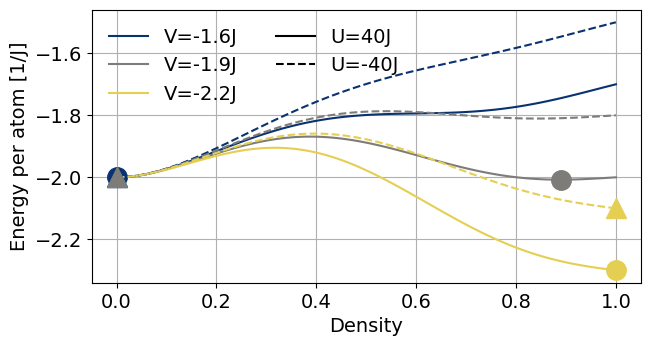

In [3]:
ns = list(arange(0.01,1.001,0.01))
fig,ax = plt.subplots(1,1,figsize=(18/2.54, 9/2.54))

colors = my_cmap(linspace(0.1,0.9,3))

ax.plot([0]+list(ns), Eplus[Vs[0]], label="V="+str(Vs[0])+"J",color=colors[0])
ax.plot([0]+list(ns), Eplus[Vs[1]], label="V="+str(Vs[1])+"J",color=colors[1])
ax.plot([0]+list(ns), Eplus[Vs[2]], label="V="+str(Vs[2])+"J",color=colors[2])

ax.plot(Eplus[Vs[0]].index(min(Eplus[Vs[0]]))*0.01, min(Eplus[Vs[0]]), 'o',color=colors[0],markersize=14,label="")
ax.plot(Eplus[Vs[1]].index(min(Eplus[Vs[1]]))*0.01, min(Eplus[Vs[1]]), 'o',color=colors[1],markersize=14,label="")
ax.plot(Eplus[Vs[2]].index(min(Eplus[Vs[2]]))*0.01, min(Eplus[Vs[2]]), 'o',color=colors[2],markersize=14,label="")

ax.plot([0],[-2],label="U=40J",c='black')
ax.plot([0],[-2],'--',label="U=-40J",c='black')
plt.legend(ncol=2, fontsize=14,frameon=False, loc='upper left')

ax.plot([0]+list(ns), Eminus[Vs[0]], '--', label="V="+str(Vs[0])+",U=-40J",color=colors[0])
ax.plot([0]+list(ns), Eminus[Vs[1]], '--', label="V="+str(Vs[1])+",U=-40J",color=colors[1])
ax.plot([0]+list(ns), Eminus[Vs[2]], '--', label="V="+str(Vs[2])+",U=-40J",color=colors[2])

ax.plot(Eminus[Vs[0]].index(min(Eminus[Vs[0]]))*0.01, min(Eminus[Vs[0]]), '^',c=colors[0],markersize=14,label="")
ax.plot(Eminus[Vs[1]].index(min(Eminus[Vs[1]]))*0.01, min(Eminus[Vs[1]]), '^',c=colors[1],markersize=14,label="")
ax.plot(Eminus[Vs[2]].index(min(Eminus[Vs[2]]))*0.01, min(Eminus[Vs[2]]), '^',c=colors[2],markersize=14,label="")


ax.grid()
ax.tick_params(axis='both', which='major', labelsize=14)

plt.xlabel("Density",fontsize=14)
plt.ylabel("Energy per atom [1/J]",fontsize=14)
plt.savefig("gasDensityEnergy.pdf",format='pdf',dpi=300, transparent=False, bbox_inches = "tight")
plt.show()

In [4]:
ns = arange(0.881,1.001,1e-4)

def findOptimalDensity(J,U,V):
    global ns
    nopt = 0
    Emin = -2*J

    for n in ns:
        EK = -2*J*sin(pi*n)/(pi*n)
        EV = V*n*(1-(sin(pi*n)/(pi*n))**2)
        EU = -4*J*J/U*n*( 1-sin(2*pi*n)/(2*pi*n))
        if EK+EV+EU < Emin:
            Emin = EK+EV+EU
            nopt = n
    return nopt



In [5]:
Us = arange(20,45.01,0.5)
Vs = arange(-1.71,-2.24001,-0.002)
VsLeft = arange(0,-0.14,-0.002)
VsRight = arange(-7.86,-8.000002,-0.002)

nOptsPlus = []
nOptsLeftPlus = []
nOptsRightPlus = []

nOptsMinus = []
nOptsLeftMinus  = []
nOptsRightMinus  = []
for U in Us:
    print(U,end=',')
    nOptsPlus.append( [] )
    nOptsLeftPlus.append( [0]*len(VsLeft))
    nOptsRightPlus.append( [1]*len(VsRight))
    nOptsMinus.append( [] )
    nOptsLeftMinus.append( [0]*len(VsLeft))
    nOptsRightMinus.append( [1]*len(VsRight))
    for V in Vs:
        nOptsPlus[-1].append(findOptimalDensity(1,U,V))
        nOptsMinus[-1].append(findOptimalDensity(1,-U,V))
        

20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0,30.5,31.0,31.5,32.0,32.5,33.0,33.5,34.0,34.5,35.0,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0,40.5,41.0,41.5,42.0,42.5,43.0,43.5,44.0,44.5,45.0,

In [6]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
  Source: https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = hstack([
        linspace(0.0, midpoint, 128, endpoint=False), 
        linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    matplotlib.colormaps.register(cmap=newcmap)
   # plt.register_cmap(cmap=newcmap)

    return newcmap
tmp = shiftedColorMap(my_cmap, midpoint=0.8, name='shifted_cmap')

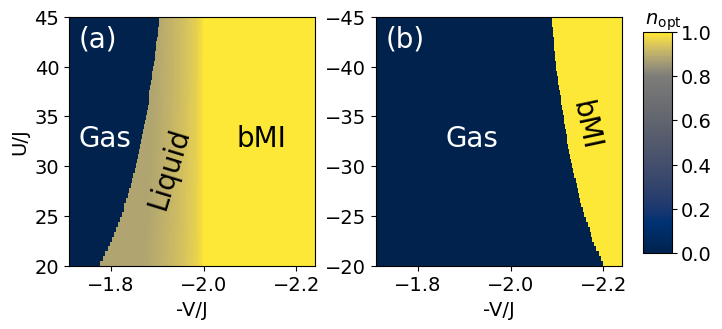

In [7]:
Us = arange(20,45.01,0.5)
Vs = arange(-1.71,-2.24001,-0.002)

fig, ax = plt.subplots(1,2,figsize=(18/2.54,8/2.54))

pos1 = ax[0].imshow(nOptsPlus,interpolation='none',cmap='shifted_cmap',origin='lower',aspect='auto',vmin=0,vmax=1, extent=[Vs[0],Vs[-1],min(Us),max(Us)])
pos2 = ax[1].imshow(nOptsMinus,interpolation='none',cmap='shifted_cmap',origin='lower',aspect='auto',vmin=0,vmax=1, extent=[Vs[0],Vs[-1],-min(Us),-max(Us)])

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[0].text(-1.87,26, 'Liquid',rotation=73,c='black',fontsize=20)
ax[0].text(-1.73,32, 'Gas',rotation=0,c='white',fontsize=20)
ax[0].text(-2.07,32, 'bMI',rotation=0,c='black',fontsize=20)

ax[1].text(-1.86,-32, 'Gas',rotation=0,c='white',fontsize=20)
ax[1].text(-2.12,-32, 'bMI',rotation=-78,c='black',fontsize=20)
plt.tight_layout()
ax[0].set_xlabel('-V/J', fontsize=14)
ax[1].set_xlabel('-V/J', fontsize=14)
ax[0].set_ylabel('U/J', fontsize=14)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.18, 0.04, 0.7])

cbar = fig.colorbar(pos2, cax=cbar_ax)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)
cbar.ax.set_title(r'  $n_{\rm opt}$',fontsize=14)

ax[0].text(-1.73, 42, '(a)', fontdict=None, c='white',fontsize=20)
ax[1].text(-1.73, -42, '(b)', fontdict=None, c='white',fontsize=20)

plt.savefig("optDensity.pdf",format='pdf',dpi=300, transparent=False, bbox_inches = "tight")
plt.show()

In [8]:
colors = my_cmap(linspace(0.1,0.9,4))

Us = arange(20,45.01,0.5)
Vs = arange(1.71,2.24001,0.002)
transitionLPlus = []
transitionMIPlus = []
transitionMIMinus = []

for row in nOptsPlus:
    foundL = 0
    foundMI = 0
    for i in range(len(row)):
        if foundL==0 and row[i]>0.0001:
            transitionLPlus.append(Vs[i])
            foundL=1
        if foundMI==0 and row[i]>0.9999:
            transitionMIPlus.append(Vs[i])
            foundMI=1
            
for row in nOptsMinus:
    foundMI = 0
    for i in range(len(row)):
        if foundMI==0 and row[i]>0.9999:
            transitionMIMinus.append(Vs[i])
            foundMI=1

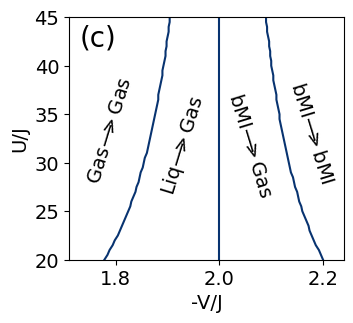

In [9]:
fig, ax = plt.subplots(1,figsize=(9/2.54,8/2.54))
            
ax.plot(transitionLPlus,Us,c=colors[0])
ax.plot(transitionMIPlus,Us,c=colors[0])
ax.plot(transitionMIMinus,Us,c=colors[0])

ax.tick_params(axis='both', which='major', labelsize=14)

ax.text(1.73, 42, '(c)', fontdict=None, c='black',fontsize=20)
ax.text(1.74,28, 'Gas$-\!\!\!-\!\!\!\!\!\!>$Gas',rotation=73,c='black',fontsize=14)
ax.text(1.88,27, 'Liq$-\!\!\!-\!\!\!\!\!\!>$Gas',rotation=73,c='black',fontsize=14)
ax.text(2.01,26.5, 'bMI$-\!\!\!-\!\!\!\!\!\!>$Gas',rotation=-73,c='black',fontsize=14)
ax.text(2.13,28, 'bMI$-\!\!\!-\!\!\!\!\!\!>$bMI',rotation=-73,c='black',fontsize=14)

ax.set_ylim([min(Us),max(Us)])
ax.set_xlim([Vs[0],Vs[-1]])
ax.set_xlabel('-V/J', fontsize=14)
ax.set_ylabel('U/J', fontsize=14)
plt.savefig("optDensityPhaseTrans.pdf",format='pdf',dpi=300, transparent=False, bbox_inches = "tight")
plt.show()